# Boston Housing Prices

### Libraries

In [2]:
import numpy as np # For numerical calculations
import statistics # For numerical calculations
import matplotlib.pyplot as plt #For graphical representations
import seaborn as sns #For graphical representations
import pandas as pd #For data manipulation
import scipy.stats as ss # For calculating skew
%matplotlib inline

## Introduction

The Boston Housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusetts.


The data was originally published by Harrison, D. and Rubinfeld, D.L. in their study of `Hedonic prices and the demand for clean air' in 1978.

### The Dataset

The Boston dataset has 506 rows and 14 columns. This data frame contains the following columns:

- **crim:** per capita crime rate by town.
- **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus:** proportion of non-retail business acres per town.
- **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox:** nitrogen oxides concentration (parts per 10 million).
- **rm:** average number of rooms per dwelling.
- **age:** proportion of owner-occupied units built prior to 1940.
- **dis:** weighted mean of distances to five Boston employment centres.
- **rad:** index of accessibility to radial highways.

- **tax:** full-value property-tax rate per \$10000 dollars.
- **ptratio:** pupil-teacher ratio by town.
- **black:** 1000(Bk - 0.63)$^{2}$ where Bk is the proportion of blacks by town.
- **lstat:** lower status of the population (percent).
- **medv:** median value of owner-occupied homes in \$1000s.

### Project Plan

- Describe the dataset, and investigate the summary statistics for each category (column).
- Identify correlation between different categories by graphing the data and calculating relevant statisical measures. 
- Use summary statistic to see if there is a relationship between median house values in properties along the Charles River.
- Analysis and prediction of house prices based on different factors.


## Summary Statistics

In [3]:
df = pd.read_csv('data/houses.csv')
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The **medv** or median value of properties has a smaller range of values than I initially expected. This is probably as a result of the data been collected in the seventies. Properties range in value from \$5000 to \$50000, and this category has similar mean and median values, implying that there are no extreme values or outliers. 

The **crim** or per capita crime rate by town is a different story, with a huge range and a mean that is 14 times larger than the median value. This implies that there are a number of outliers in this category and they are very large values. This becomes obvious when we plot crime against median value. There are a number of outliers, but it is interesting to note that these properties in towns with a larger crime rate, have a lower median value.

We can see this clearly when we plot the crime rate against median house values.

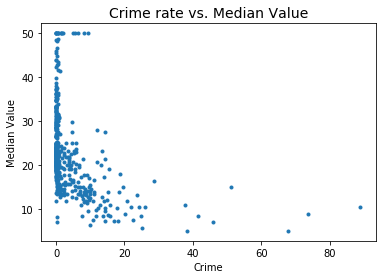

In [108]:
plt.plot(df['crim'], df['medv'], '.')
plt.title('Crime rate vs. Median Value', fontsize = 14)
plt.xlabel('Crime')
plt.ylabel('Median Value');

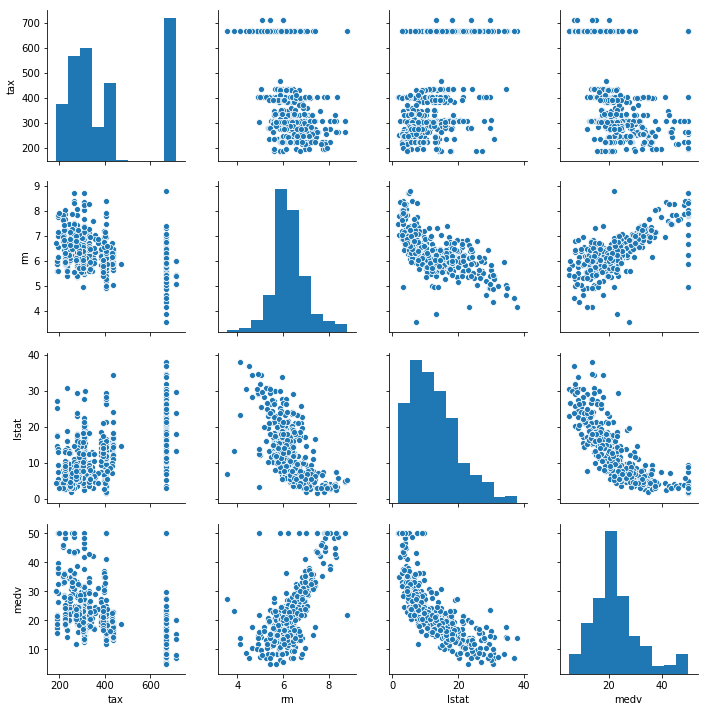

In [109]:
sns.pairplot(df[['tax', 'rm', 'lstat', 'medv']]);

- Properties with an average or above average number of rooms appear are more likely to have a higher median value. 
- Properties in areas with a higher proportion of lower status people appear to have a below average value. 

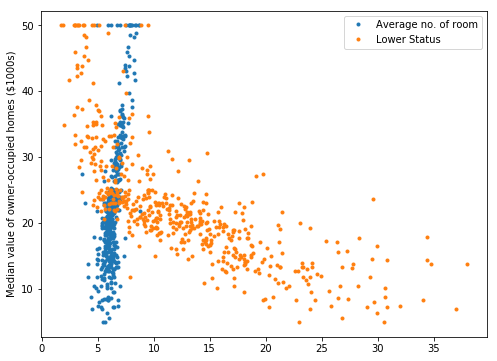

In [110]:
plt.figure(figsize = (8, 6))
plt.ylabel('Median value of owner-occupied homes ($1000s)')
lineObjects = plt.plot(df[['rm', 'lstat']], df['medv'], '.')
plt.legend(iter(lineObjects), ('Average no. of room', 'Lower Status'));

My only discrete variable are chas (variable identifying houses along the Charles River) and rad (the index of accessbility to radial highways). Chas has only two variables while Rad contains 9. 

In [161]:
pd.DataFrame(df['chas'].value_counts())

,chas
0,471
1,35


The chas value will be examined in more detail, later in this investigation. For now, it's important to note that the data contains only 35 datapoints along the Charles River.

In [160]:
pd.DataFrame(df['rad'].value_counts()).sort_index()

,rad
1,20
2,24
3,38
4,110
5,115
6,26
7,17
8,24
24,132


Rad obviously contains outliers, with 132 datapoints reporting a radial index of 24. However this makes 24 the modal radial index. Looking at the histogram, it's obvious this measure of central tendency is not an accurate reflection of accessibility to radial highways.

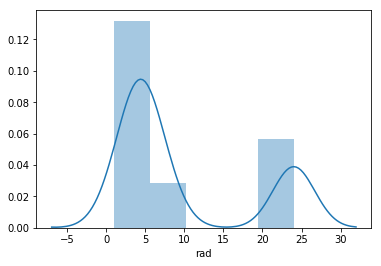

In [165]:
sns.distplot(df['rad']);

I'm interested to see if my discrete data has any obvious relationship to median house values, and I will use boxplots to look for how these factors inflence property values.

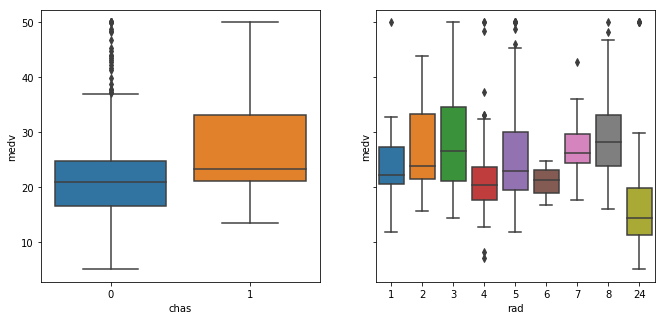

In [164]:
f, axes = plt.subplots(1, 2, figsize = (11, 5), sharey=True)
sns.boxplot(x = 'chas', y = 'medv', data =df, orient='v', ax=axes[0])
sns.boxplot(x = 'rad', y = 'medv', data =df, orient='v', ax=axes[1])
plt.show()

## Identifying Correlation

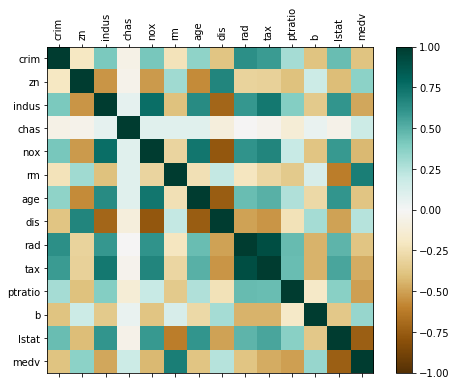

In [112]:
#Adapted from 
#https://medium.com/@sebastiannorena/finding-correlation-between-many-variables-multidimensional-dataset-with-python-5deb3f39ffb3
corr = df.corr()#Set corr to be 
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='BrBG', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

From the map above, it's obvious that the rm and lstat are good indicators of values, as predicted. This is verified when I calculate the correlation coefficient and r-squared values. 

In [113]:
#Returns table with correlation coefficients for all variables
corr = df.corr(method = 'pearson')
df_ = pd.DataFrame({'CorrCoeff':corr['medv']})
df_['r-squared'] =(corr['medv'])**2
df_

,CorrCoeff,r-squared
crim,-0.388305,0.150780
zn,0.360445,0.129921
indus,-0.483725,0.233990
chas,0.175260,0.030716
nox,-0.427321,0.182603
rm,0.695360,0.483525
age,-0.376955,0.142095
dis,0.249929,0.062464
rad,-0.381626,0.145639
tax,-0.468536,0.219526


- As expected the average number of rooms positively impacts median house value, with a significant correlation coefficient
- The proportion of the population defined as lower status negatively impacts median house value, and is the most significant factor impacting value. 
- There actually appears to be very little correlation between crime and median house value.
- Indus, nox, tax, and pupil teacher ratio are all have greater evidence of correlation with median house prices, than the proportion of crime in the area.
- That been said they're not as significant as either the number of rooms or status of the population. 

While informative, these measures estimate the strength of a relation between bivariate data. I'm comparing all the variables to median values to try to determine which values have a strong positive or negative impact on house prices. The reality is probably more complex. It is likely that a combination of these variables have an impact on determining median house prices. 

## Attempting to fit a Polynomial

Looking at the two variables with the greatest correlation to house values, I attempted to find a polynomial that would be a good fit for the relationship between that variable and house values. 

The two variables with the greatest correlation are, the number of rooms and the proportion of lower status people in the population. The number of rooms provides difficulty because that is a discrete variable, and so cannot be modelled by a polynomial. So I'll look first at modelling the proportion of lower status people and the median value of houses.

In [194]:
status=df['lstat']
val=df['medv']

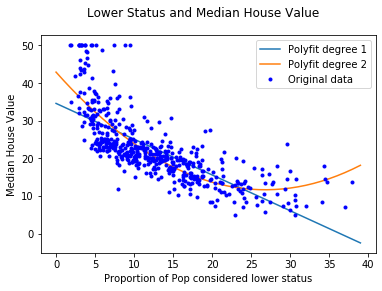

In [97]:
plt.figure()
x = np.arange(40)
# Polynomial of degree 1
[m, c] =np.polyfit(status, val, 1)
y1 = m*x +c
plt.plot(x, y1, label = 'Polyfit degree 1')
#Polynomial of degree 2
[r, s, t] =np.polyfit(status, val, 2)
y2 = r*x*x +s*x +t
plt.plot(x, y2, label = 'Polyfit degree 2')
plt.plot(status, val, 'b.', label = 'Original data')

plt.suptitle('Lower Status and Median House Value')
plt.xlabel('Proportion of Pop considered lower status')
plt.ylabel('Median House Value')
plt.legend();

## What adds value to your home?

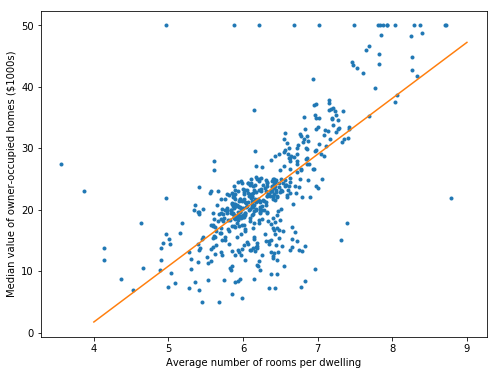

In [76]:
plt.figure(figsize = (8, 6))
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes ($1000s)');

[m,c] = np.polyfit(df['rm'], df['medv'], 1)
x = np.arange(4, 10)
y = m*x +c
plt.plot(df['rm'], df['medv'], '.')
plt.plot(x, y);

## Charles River

The Charles River dummy value (**chas**) tells us if a datapoint is located along the Charles River. This variable is either 1 (along the river) or 0 (not along the river). It's obvious from looking at the frequncy of results, there are a very small number of properties in this dataset that are along the Charles River. 

In [114]:
print(np.bincount(df['chas']))

[471  35]


Only 35 out of 506 datapoints are located along the river, and from an initial look at the mean and median values it appears that their location may have a positive impact on property values.

In [115]:
onChas = df.loc[df['chas']==1]
print('Properties along Charles River')
print('Mean value: ', np.mean(onChas['medv']))
print('Median value: ', statistics.median(onChas['medv']))

Properties along Charles River
Mean value:  28.44
Median value:  23.3


In [116]:
notOnChas = df.loc[df['chas']==0]
print('Properties NOT along Charles River')
print('Mean value: ', np.round(np.mean(notOnChas['medv']), 2))
print('Median value: ', statistics.median(notOnChas['medv']))

Properties NOT along Charles River
Mean value:  22.09
Median value:  20.9


While the summary statistics appear to imply a relationship between the chas value and house prices, the small sample size is problematic. This is most obvious when I plotted the data on a swarmplot. While properties along the river have a larger median and a smaller range, there is considerably fewer of them. 

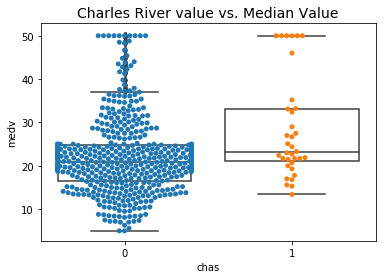

In [117]:
f, ax = plt.subplots()
plt.title('Charles River value vs. Median Value', fontsize = 14)
ax =sns.swarmplot(x='chas', y = 'medv', data = df);
sns.boxplot(df['chas'], df['medv'], ax = ax, 
            boxprops={'facecolor':'None'}, whiskerprops={'linewidth':0});

Looking at their distribution, we can see some variation in house values.

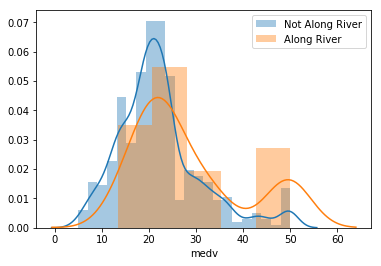

In [118]:
sns.distplot(notOnChas['medv'], label = 'Not Along River')
sns.distplot(onChas['medv'], label ='Along River')
plt.legend();

House values are a type of data which can be dependent. Property values are often influenced by recent sales and so properties in a small geographic area can be influenced by local house values. However in statistics, these variables are independent. Each datapoint corresponds to a different town or geograpical area and the median value of properties in that area.

So I can perform an independent T-test on this data. I want to compare the median value of properties on the Charles River, to properties that are not located along the river. Working on the assumption that there is no relationship, my hypothesis is that these properties will have the same mean. 

I can perform a T-test to determine if this is the case.

In [119]:
Ttest = ss.ttest_ind(onChas['medv'], notOnChas['medv'])
print('T-statistic:', Ttest[0])
print('P-value:', Ttest[1])

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


Looking only at the p-value, it seems very unlikely that the means from these two samples are the same. The p-value is very small, but that on it's own might not be sufficient to reject the hypothesis. I will compare the absolute value of the t-statistic to the critical value.

In [120]:
t = Ttest[0]
crit = np.abs(ss.t.ppf(0.975, len(onChas) + len(notOnChas) - 2.0))
print('Critical value:', crit)

Critical value: 1.964682003389552


The hypothesis that the data for properties on Charles River, has the same mean as properties not located along the river, is false. The T-statistic is much larger than the critical value. This implies that the T-statistic is too large for our hypothesis to be true. We must reject the hypothesis and accept that the properties on Charles River, have a different mean value than properties not located along the river.

If the means are different, we can return to our initial assumption based on statistical and graphical analysis. 

Properties located along the Charles River have, on average, a greater property value. But when I was looking for correlation between different factors and median house values, the Charles River dummy value was not a good indicator for value.

In [125]:
df_.loc['chas']

CorrCoeff    0.175260
r-squared    0.030716
Name: chas, dtype: float64

This shows no relationship or a very weak relationship between the chas and median value. So while properties along the river have higher median value, there is no correlation between location to the river and value. 

## Machine Learning with Keras

In [127]:
import keras as kr
import sklearn.preprocessing as pre

In [175]:
y = df['medv']
x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]

In [192]:
scaler = pre.StandardScaler()
scaler.fit(x)
#scaler.mean_, scaler.scale_

StandardScaler(copy=True, with_mean=True, with_std=True)

In [193]:
xscale = pd.DataFrame(scaler.transform(x), columns =x.columns)

In [185]:
#TO scale new data not currently included in x
#scaler.transform(np.array[[My inputs for new data]])

In [178]:
m = kr.models.Sequential()
m.add(kr.layers.Dense(30, input_dim=13, activation="linear"))
m.add(kr.layers.Dense(30, activation="sigmoid"))
m.add(kr.layers.Dense(30, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))
m.compile(loss='mean_squared_error', optimizer = 'adam')

In [179]:
m.fit(x, y, epochs = 30, batch_size = 20)

Epoch 1/30
506/506 [==============================] - 2s 4ms/step - loss: 456.5003
Epoch 2/30
506/506 [==============================] - 0s 755us/step - loss: 310.1536
Epoch 3/30
506/506 [==============================] - 0s 397us/step - loss: 200.1205
Epoch 4/30
506/506 [==============================] - 0s 271us/step - loss: 120.8479
Epoch 5/30
506/506 [==============================] - 0s 253us/step - loss: 86.9381
Epoch 6/30
506/506 [==============================] - 0s 215us/step - loss: 79.9021
Epoch 7/30
506/506 [==============================] - 0s 346us/step - loss: 76.6407
Epoch 8/30
506/506 [==============================] - 0s 332us/step - loss: 74.4318
Epoch 9/30
506/506 [==============================] - 0s 344us/step - loss: 71.5201
Epoch 10/30
506/506 [==============================] - 0s 358us/step - loss: 70.4855
Epoch 11/30
506/506 [==============================] - 0s 451us/step - loss: 67.8765
Epoch 12/30
506/506 [==============================] - 0s 615us/step - l

In [180]:
predictions = m.predict(x).T # an array
actual_output = y.as_matrix()

C:\Users\mario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [181]:
np.around(actual_output)

array([24., 22., 35., 33., 36., 29., 23., 27., 16., 19., 15., 19., 22.,
       20., 18., 20., 23., 18., 20., 18., 14., 20., 15., 14., 16., 14.,
       17., 15., 18., 21., 13., 14., 13., 13., 14., 19., 20., 21., 25.,
       31., 35., 27., 25., 25., 21., 19., 20., 17., 14., 19., 20., 20.,
       25., 23., 19., 35., 25., 32., 23., 20., 19., 16., 22., 25., 33.,
       24., 19., 22., 17., 21., 24., 22., 23., 23., 24., 21., 20., 21.,
       21., 20., 28., 24., 25., 23., 24., 27., 22., 22., 24., 29., 23.,
       22., 23., 25., 21., 28., 21., 39., 44., 33., 28., 26., 19., 19.,
       20., 20., 20., 20., 20., 19., 22., 23., 19., 19., 18., 18., 21.,
       19., 20., 19., 22., 20., 20., 17., 19., 21., 16., 16., 18., 14.,
       19., 20., 23., 18., 16., 18., 17., 17., 13., 18., 14., 14., 13.,
       16., 12., 14., 16., 15., 18., 15., 22., 20., 15., 19., 17., 16.,
       13., 41., 24., 23., 27., 50., 50., 50., 23., 25., 50., 24., 24.,
       22., 17., 19., 23., 24., 23., 29., 23., 25., 30., 37., 40

In [182]:
#Predicted outputs
np.round(predictions)

array([[26., 26., 26., 30., 29., 28., 26., 21., 21., 21., 21., 24., 26.,
        26., 21., 26., 26., 21., 18., 25., 21., 21., 21., 21., 21., 18.,
        21., 18., 21., 21., 21., 21., 18., 21., 18., 26., 26., 26., 26.,
        32., 33., 29., 29., 29., 26., 26., 26., 26., 22., 26., 26., 26.,
        31., 30., 20., 33., 30., 33., 27., 26., 26., 26., 26., 26., 32.,
        30., 27., 26., 26., 26., 26., 26., 26., 26., 20., 18., 18., 18.,
        18., 18., 27., 26., 27., 26., 26., 26., 26., 26., 26., 26., 26.,
        26., 26., 27., 26., 26., 26., 26., 26., 26., 18., 18., 18., 18.,
        18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
        18., 18., 18., 26., 25., 25., 21., 25., 26., 20., 18., 18., 18.,
        18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
        18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
        18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,
        18., 18., 18., 23., 26., 26., 26., 26., 26.

In [183]:
#Calculating the standard error
np.sqrt(np.sum((predictions - actual_output)**2))

172.64779084800014

## Other investigations

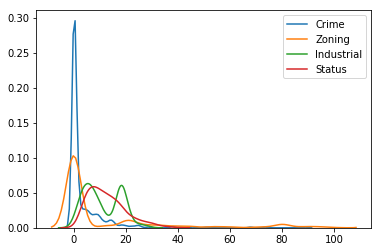

In [77]:
f, ax = plt.subplots()
ax = sns.distplot(df['crim'], ax=ax,
             hist=False, label ='Crime');

sns.distplot(df['zn'], ax=ax,
             hist=False, label ='Zoning');
sns.distplot(df['indus'], ax=ax,
             hist=False, label ='Industrial');
sns.distplot(df['lstat'], ax=ax,
             hist=False, label ='Status');
ax.legend()
ax.set_xlabel(None);

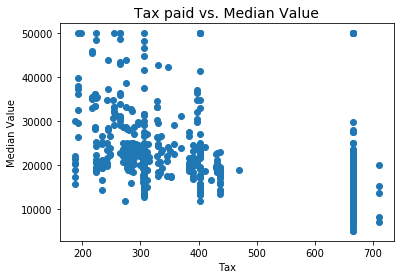

In [78]:
tax = df['tax']
value = df['medv']*1000
plt.title('Tax paid vs. Median Value', fontsize = 14)
plt.xlabel('Tax')
plt.ylabel('Median Value')
plt.scatter(tax, value);

## References


- [About the Boston Dataset, Delve Project at www.cs.toronto.edu](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)